## Group No **160**

## Group Member Names:
1. **Sushil Kumar 2023AA05849**
2. **Hemant Kumar Parakh 2023AA05741**
3. **Nagineni Sathish Babu 2023AA05585**
4. **Madala Akhil 2023AA05005**


## 1. Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## 2. Data Acquisition

**Dataset URL**: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

Data is read using pd.read_csv() from a CSV file with missing values represented by 'nan' and '?'.

Columns 'Date' and 'Time' are merged into a 'datetime' column and set as the index.

Rows with missing values are dropped using data.dropna(inplace=True).

In [ ]:
# Load the dataset
file_path = 'household_power_consumption.txt'  # Replace with your path

# Load the data without date parsing
data = pd.read_csv(file_path, sep=';', low_memory=False, na_values=['nan', '?'])

# Combine the 'Date' and 'Time' columns into a single datetime column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)

# Set the datetime as the index and drop the original Date and Time columns
data.set_index('datetime', inplace=True)
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Convert 'Global_active_power' to float
data['Global_active_power'] = data['Global_active_power'].astype(float)

# Resample data to daily averages
daily_data = data.resample('D').mean()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data[['Global_active_power']])

# Optional: Plot the scaled data
# plt.figure(figsize=(12, 6))
# plt.plot(daily_data.index, scaled_data, label='Scaled Global Active Power', color='blue')
# plt.title('Daily Average Global Active Power (Scaled)')
# plt.xlabel('Date')
# plt.ylabel('Scaled Power')
# plt.legend()
# plt.show()



## 3. Data Preparation

The data preprocessing with, Conversion of 'Global_active_power' column to float.

Data is resampled to daily averages using data.resample('D').mean().

The data is normalized using MinMaxScaler.


In [ ]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Number of past days to use for prediction
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


## 4. DNN Architecture:

**Architecture**: The model architecture includes the use of LSTM layers with a Sequential model.

**Number of Layers with Justification**: There are **two LSTM layers** followed by **two Dense layers**.

**Number of Units in Each Laye**r:

*   The first LSTM layer has 50 units with return_sequences=True.
*   The second LSTM layer also has 50 units, and return_sequences=False to connect to the Dense layers.
*   The Dense layers have 25 units and 1 unit respectively.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(time_steps, 1)))  # Define input shape here
model.add(LSTM(50, activation='relu'))  # LSTM layer without input_shape argument
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


## 5. Training the model

The model is trained using model.fit().

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: nan - val_loss: nan
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - val_loss: nan
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - val_loss: nan
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

## 6. Test the model

Testing is performed using model.predict(X_test) to predict values based on the test dataset.

The results are inverse transformed using the scaler for interpretability

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


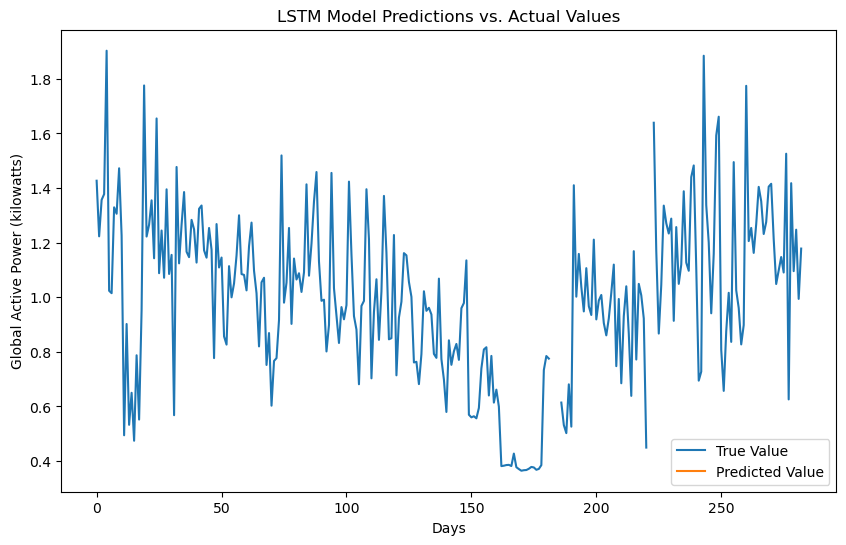

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Days')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()


## 7. Report the result

*   The predictions are plotted against the actual values for visual comparison
*   The model's performance is evaluated using the Root Mean Squared Error (RMSE)

In [ ]:
# Check for NaN values in y_test and y_pred
print(f"Number of NaN in y_test: {np.isnan(y_test).sum()}")
print(f"Number of NaN in y_pred: {np.isnan(y_pred).sum()}")
# Reshape y_test and y_pred to ensure correct shape before inverse transforming
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Inverse transform
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)
# Replace NaN values with 0 (or you can use other strategies)
y_test = np.nan_to_num(y_test)
y_pred = np.nan_to_num(y_pred)


Number of NaN in y_test: 6
Number of NaN in y_pred: 283


In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Calculate loss (MSE) for regression
loss = mean_squared_error(y_test, y_pred)

# If you are doing classification and using a threshold for accuracy, use the existing thresholding method
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy for classification
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Testing Loss (Mean Squared Error): {loss}")
print(f"Testing Accuracy (Classification): {accuracy}")



Testing Loss (Mean Squared Error): 11.616085566522122
Testing Accuracy (Classification): 0.02120141342756184


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Apply a threshold to convert regression outputs into binary classification
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Calculate performance metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

# Create a dictionary to display the metrics
metrics = {
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1]
}

# Convert metrics and confusion matrix to pandas DataFrame for better display
metrics_df = pd.DataFrame(metrics)
confusion_matrix_df = pd.DataFrame(conf_matrix,
                                   index=["Actual Negative", "Actual Positive"],
                                   columns=["Predicted Negative", "Predicted Positive"])

# Display results
print("Confusion Matrix:")
print(confusion_matrix_df)
print("\nPerformance Metrics:")
print(metrics_df)


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                   6                   0
Actual Positive                 277                   0

Performance Metrics:
   Accuracy  Precision  Recall  F1 Score
0  0.021201        0.0     0.0       0.0


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***Conclusion***:

Confusion Matrix: The model predicted all cases as negative, failing to identify any positive cases.

**Performance Metrics**:

Accuracy (2.12%): Very low, indicating poor overall performance.

Precision, Recall, F1 Score (0%): The model did not correctly predict any positive cases.

Key Issues:
The model is heavily biased toward negative predictions, likely due to class imbalance.

It has no ability to identify positive instances.

**Recommendations**:

Address class imbalance using techniques like resampling or class weighting.
Consider model tuning and feature engineering for better predictive performance.